In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
dataset = pd.read_csv('SaratogaHouses.csv')

In [20]:
dataset.head()

,Unnamed: 0,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,1,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,2,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,3,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,4,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,5,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [0]:
livingArea = dataset['livingArea']
landValue = dataset['landValue']
rooms = dataset['rooms']
centralAir = dataset['centralAir']
price = dataset['price']

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
encoder = LabelEncoder()
centralAir = encoder.fit_transform(centralAir)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
n = len(price)
X0 = np.ones(n)
X = np.array([X0, livingArea, landValue, rooms, centralAir]).T
y = np.array(price)
B = np.zeros(5)

In [26]:
std = StandardScaler()
X = std.fit_transform(X)
X

array([[ 0.        , -1.36985441,  0.44108417, -0.88163155, -0.76221375],
       [ 0.        ,  0.31951971, -0.350095  , -0.44981202, -0.76221375],
       [ 0.        ,  0.30499787, -0.77853137,  0.41382706, -0.76221375],
       ...,
       [ 0.        , -1.05844161, -0.4043636 , -1.74527063, -0.76221375],
       [ 0.        , -0.85513584, -0.50718833, -0.01799248, -0.76221375],
       [ 0.        ,  0.32920094, -0.24441402, -0.44981202, -0.76221375]])

In [0]:
y = y.reshape(y.shape[0],1)
y = std.fit_transform(y)

In [0]:
def cost_function(X,y,B):
    h = np.sum((X.dot(B)-y) **2) / (2*n)
    return h

In [29]:
cost_function(X,y,B)

864.0000000000001

In [0]:
def gradient_descent(X,y,B,epoach, alpha):
    cost_history = [0]*epoach
    
    for i in range(epoach):
        y_pred = X.dot(B)
        loss = y_pred - y
        gradient = X.T.dot(loss) / n
        B = B - alpha * gradient
        cost_history[i] = cost_function(X,y,B)
    return cost_history,B     

In [0]:
cost, b = gradient_descent(X,y.flatten(),B,epoach=1000, alpha = 0.01)

In [32]:
cost

[0.4877498766269124,
 0.47601219008414025,
 0.4647653273675879,
 0.4539885888431336,
 0.44366214962528194,
 0.4337670225891992,
 0.4242850229470482,
 0.4151987343224607,
 0.40649147625978443,
 0.398147273107421,
 0.3901508242171375,
 0.3824874754036942,
 0.37514319161148363,
 0.3681045307371296,
 0.36135861855915785,
 0.3548931247279129,
 0.3486962397708805,
 0.34275665307046876,
 0.33706353177311915,
 0.3316065005903562,
 0.3263756224540542,
 0.3213613799897907,
 0.3165546577736873,
 0.3119467253396011,
 0.30752922090493134,
 0.30329413578464787,
 0.29923379946443446,
 0.2953408653050709,
 0.29160829685135475,
 0.288029354719997,
 0.28459758404200236,
 0.2813068024360857,
 0.2781510884906626,
 0.2751247707329074,
 0.27222241706427686,
 0.2694388246427723,
 0.26676901019304705,
 0.264208200726262,
 0.2617518246523628,
 0.2593955032681794,
 0.25713504260545567,
 0.254966425623585,
 0.2528858047324748,
 0.25088949463157695,
 0.24897396545171335,
 0.24713583618689097,
 0.24537186840384156

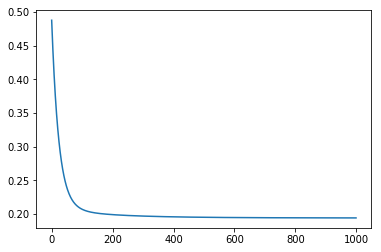

In [33]:
X1 = [i for i in range(1000)]
plt.plot(X1,cost)